# torch和torchvision

导入必要的包

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

# PyTorch 之torch.transforms

对数据载入及有相应变化

In [2]:
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

获取训练集和测试集

In [3]:
data_train = datasets.MNIST(root="F:\\python_study\\MNIST\\",
                           transform=transform,
                           train=True,
                           download = True)
data_test = datasets.MNIST(root="F:\\python_study\\MNIST\\",
                          transform=transform,
                          train=False)

# 数据预览和数据装载 

在装载时通过batch_size的值确认每个包的大小，通过shuffle的值来确认是否在装载的过程中打乱图片的顺序

In [4]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                             batch_size=64,
                                             shuffle=True)
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                            batch_size=64,
                                            shuffle=True)

数据预览

[tensor(7), tensor(4), tensor(3), tensor(7), tensor(5), tensor(9), tensor(8), tensor(8), tensor(9), tensor(6), tensor(5), tensor(2), tensor(2), tensor(7), tensor(2), tensor(6), tensor(3), tensor(1), tensor(9), tensor(6), tensor(7), tensor(4), tensor(7), tensor(7), tensor(4), tensor(1), tensor(1), tensor(1), tensor(6), tensor(0), tensor(4), tensor(0), tensor(0), tensor(4), tensor(6), tensor(1), tensor(4), tensor(3), tensor(2), tensor(2), tensor(3), tensor(1), tensor(3), tensor(2), tensor(8), tensor(5), tensor(0), tensor(1), tensor(4), tensor(3), tensor(0), tensor(5), tensor(3), tensor(9), tensor(9), tensor(2), tensor(9), tensor(8), tensor(2), tensor(2), tensor(0), tensor(5), tensor(7), tensor(8)]


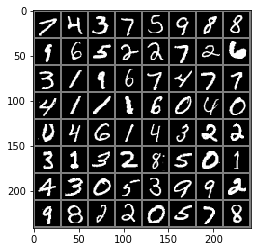

In [5]:
images, labels =next(iter(data_loader_train)) 
img = torchvision.utils.make_grid(images)
img = img.numpy().transpose(1,2,0)
std=[0.5,0.5,0.5]
mean=[0.5,0.5,0.5]
img=img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

# 搭建模型和参数优化

实现卷积神经网络模型

In [6]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.conv1=torch.nn.Sequential(
        torch.nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(stride=2,kernel_size=2))
        
        self.dense=torch.nn.Sequential(
        torch.nn.Linear(14*14*128,1024),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(1024,10))
        
    def forward(self, x):
        x=self.conv1(x)
        x=x.view(-1,14*14*128)
        x=self.dense(x)
        return x

定义再训练之前使用的损失函数和优化函数

In [7]:
model=Model()
cost=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [8]:
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


卷积神经网络模型进行模型训练和参数优化

In [9]:
n_epochs=5
for epoch in range(n_epochs):
    running_loss=0.0
    running_correct=0
    print("Epoch {}/{}".format(epoch,n_epochs))
    print("-"*10)
    for data in data_loader_train:
        x_train, y_train = data
        x_train, y_train = Variable(x_train), Variable(y_train)
        outputs = model(x_train)
        _,pred = torch.max(outputs.data,1)
        optimizer.zero_grad()
        loss=cost(outputs,y_train)
        
        loss.backward()
        optimizer.step()
        #running_loss += loss.data[0]
        running_loss += loss.item()
        running_correct += torch.sum(pred==y_train.data)
    testing_correct=0
    for data in data_loader_test:
        x_test, y_test = data
        x_test, y_test = Variable(x_test), Variable(y_test)
        outputs = model(x_test)
        _,pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is :{:.4f}, Train Accuracy is :{:.4f}, Test Accuracy is :{:.4f}".format(running_loss/len(data_train),
                                                                                        100*running_correct/len(data_train),
                                                                                       100*testing_correct/len(data_test)))

Epoch 0/5
----------
Loss is :0.0020, Train Accuracy is :96.0000, Test Accuracy is :98.0000
Epoch 1/5
----------
Loss is :0.0007, Train Accuracy is :98.0000, Test Accuracy is :98.0000
Epoch 2/5
----------
Loss is :0.0005, Train Accuracy is :99.0000, Test Accuracy is :98.0000
Epoch 3/5
----------
Loss is :0.0003, Train Accuracy is :99.0000, Test Accuracy is :98.0000
Epoch 4/5
----------
Loss is :0.0003, Train Accuracy is :99.0000, Test Accuracy is :98.0000


测试

Predict label is: [tensor(3), tensor(7), tensor(1), tensor(7), tensor(2), tensor(3), tensor(7), tensor(5), tensor(4), tensor(2), tensor(3), tensor(5), tensor(7), tensor(8), tensor(0), tensor(4), tensor(1), tensor(1), tensor(7), tensor(7), tensor(0), tensor(0), tensor(4), tensor(8), tensor(6), tensor(8), tensor(6), tensor(9), tensor(1), tensor(1), tensor(7), tensor(3), tensor(8), tensor(7), tensor(2), tensor(3), tensor(4), tensor(0), tensor(5), tensor(9), tensor(1), tensor(7), tensor(6), tensor(3), tensor(7), tensor(1), tensor(5), tensor(8), tensor(5), tensor(9), tensor(3), tensor(6), tensor(8), tensor(0), tensor(0), tensor(7), tensor(0), tensor(1), tensor(4), tensor(8), tensor(2), tensor(0), tensor(8), tensor(3)]
Real label is: [tensor(3), tensor(7), tensor(1), tensor(7), tensor(2), tensor(3), tensor(7), tensor(5), tensor(4), tensor(2), tensor(3), tensor(5), tensor(7), tensor(8), tensor(0), tensor(4), tensor(1), tensor(1), tensor(7), tensor(7), tensor(0), tensor(0), tensor(4), tensor(8

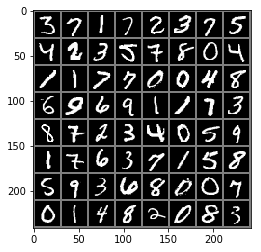

In [10]:
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                              batch_size=64,
                                              shuffle=True)
x_test, y_test = next(iter(data_loader_test))
inputs = Variable(x_test)
pred = model(inputs)
_,pred = torch.max(pred,1)

print("Predict label is:", [i for i in pred.data])
print("Real label is:",[i for i in y_test])

img=torchvision.utils.make_grid(x_test)
img=img.numpy().transpose(1,2,0)

std=[0.5,0.5,0.5]
mean=[0.5,0.5,0.5]
img=img*std+mean
plt.imshow(img)